In [16]:
!pip install shap pandas scikit-learn matplotlib seaborn



In [17]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [18]:
# Upload dataset
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [19]:
# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display original dataset
print("📄 Original Dataset:")
df.head()


📄 Original Dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
# Clean column names
df.columns = df.columns.str.strip()

# Convert TotalCharges to numeric and drop rows with missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Save customerID separately (for prediction export)
customer_ids = df['customerID']
df = df.drop(['customerID'], axis=1)

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df)

# Display preprocessed dataset
print("✅ Preprocessed & Encoded Dataset:")
df_encoded.head()


✅ Preprocessed & Encoded Dataset:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [21]:
# Split data and train model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(
    X, y, customer_ids, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7775408670931059
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1033
           1       0.61      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407



In [24]:


# Predict churn probabilities
churn_probs = model.predict_proba(X_test)[:, 1]
churn_preds = model.predict(X_test)

# Prepare results DataFrame
results = X_test.copy()
results['Churn_Probability'] = churn_probs
results['Predicted_Churn'] = churn_preds
results.insert(0, 'customerID', id_test.values)

# Reset index to make row numbers sequential
results.reset_index(drop=True, inplace=True)

# Export CSV
results.to_csv('churn_predictions.csv', index=False)

# Download
files.download('churn_predictions.csv')
results.head()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Probability,Predicted_Churn
0,6614-YWYSC,1,61,25.00,1501.75,False,True,False,True,True,...,False,True,True,False,True,False,False,False,0.00,0
1,9546-KDTRB,0,19,24.70,465.85,True,False,True,False,True,...,False,False,True,False,True,False,False,False,0.10,0
2,0871-URUWO,0,13,102.25,1359.00,False,True,False,True,True,...,False,False,False,True,False,True,False,False,0.67,1
3,5151-HQRDG,0,37,55.05,2030.75,False,True,False,True,True,...,False,False,False,True,False,False,False,True,0.12,0
4,6624-JDRDS,0,6,29.45,161.45,True,False,True,False,True,...,False,False,True,False,True,False,False,False,0.24,0


<Figure size 640x480 with 0 Axes>

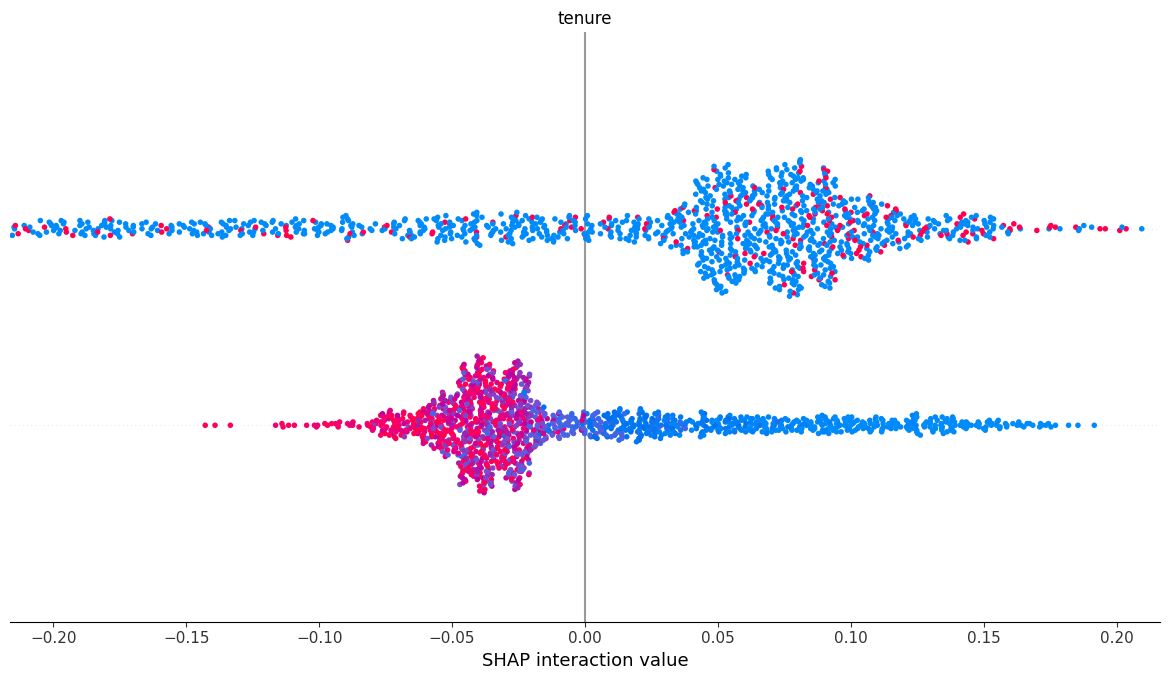

In [26]:


# Calculate SHAP values for the test set
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Check if shap_values is a list (binary classifier) or array (single output)
if isinstance(shap_values, list) and len(shap_values) == 2:
    shap.summary_plot(shap_values[1], X_test)
else:
    shap.summary_plot(shap_values, X_test)


In [27]:
# For tree models like RandomForest
importances = model.feature_importances_
feature_names = X.columns

# Create DataFrame of feature importance
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Save or visualize
feature_df.to_csv("feature_importance.csv", index=False)
feature_df.head(10)


,Feature,Importance
3,TotalCharges,0.157098
1,tenure,0.139848
2,MonthlyCharges,0.139308
36,Contract_Month-to-month,0.051333
18,OnlineSecurity_No,0.036164
43,PaymentMethod_Electronic check,0.031020
16,InternetService_Fiber optic,0.027191
27,TechSupport_No,0.025885
0,SeniorCitizen,0.020490
5,gender_Male,0.018493


In [28]:
import pandas as pd
import numpy as np

# Get churn probabilities from model
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Define risk levels
risk_levels = pd.cut(
    y_pred_proba,
    bins=[0, 0.4, 0.7, 1.0],
    labels=["Low", "Medium", "High"]
)

# Add risk level to DataFrame
retention_df = pd.DataFrame({
    'customerID': id_test,
    'Churn_Probability': y_pred_proba,
    'Risk_Level': risk_levels
})

# Reattach some key original features to personalize actions
original_test = df.loc[id_test.index]
retention_df = pd.concat([retention_df.reset_index(drop=True),
                          original_test[['Contract', 'tenure', 'MonthlyCharges']].reset_index(drop=True)], axis=1)

# Define retention strategy function
def suggest_action(row):
    if row['Risk_Level'] == 'High':
        if row['Contract'] == 'Month-to-month':
            return 'Offer annual contract discount'
        elif row['tenure'] < 6:
            return 'Send welcome loyalty reward'
        elif row['MonthlyCharges'] > 80:
            return 'Offer billing assistance'
        else:
            return 'Call customer for feedback'
    elif row['Risk_Level'] == 'Medium':
        return 'Send personalized promotion'
    else:
        return 'Monitor - no immediate action'

# Apply retention suggestions
retention_df['Retention_Strategy'] = retention_df.apply(suggest_action, axis=1)

# Save to CSV for Power BI
retention_df.to_csv("churn_retention_strategy.csv", index=False)

# Preview
retention_df.head(10)


,customerID,Churn_Probability,Risk_Level,Contract,tenure,MonthlyCharges,Retention_Strategy
0,6614-YWYSC,0.00,NaN,Two year,61,25.00,Monitor - no immediate action
1,9546-KDTRB,0.10,Low,Month-to-month,19,24.70,Monitor - no immediate action
2,0871-URUWO,0.67,Medium,Month-to-month,13,102.25,Send personalized promotion
3,5151-HQRDG,0.12,Low,Month-to-month,37,55.05,Monitor - no immediate action
4,6624-JDRDS,0.24,Low,Month-to-month,6,29.45,Monitor - no immediate action
5,3082-VQXNH,0.48,Medium,Month-to-month,3,29.80,Send personalized promotion
6,1309-XGFSN,0.09,Low,One year,52,80.85,Monitor - no immediate action
7,9402-ORRAH,0.58,Medium,Month-to-month,15,91.50,Send personalized promotion
8,8663-UPDGF,0.24,Low,Month-to-month,26,69.50,Monitor - no immediate action
9,0455-ENTCR,0.07,Low,Two year,66,85.25,Monitor - no immediate action


In [29]:
import pandas as pd
import numpy as np

# Assume these already exist from your model:
# customer_ids -> original customer IDs (Not used directly in the line causing the error now)
# y_pred_proba -> churn probability predictions (e.g., model.predict_proba(X_test)[:,1])
# y_test -> actual churn values (optional for Power BI)
# X_test -> feature data (already encoded)
# id_test -> customer IDs for the test set (correctly split with X_test and y_test)

# Step 1: Create DataFrame for export
results_df = pd.DataFrame({
    # Use id_test which was correctly split with the test data
    'customerID': id_test,
    'Churn_Probability': y_pred_proba,
    'Actual_Churn': y_test.values
})

# Step 2: Define risk levels
def assign_risk_level(prob):
    if prob >= 0.7:
        return "High"
    elif prob >= 0.4:
        return "Medium"
    else:
        return "Low"

results_df['Risk_Level'] = results_df['Churn_Probability'].apply(assign_risk_level)

# Step 3: Define retention strategies
def retention_strategy(risk):
    if risk == "High":
        return "Offer discount / personalized call"
    elif risk == "Medium":
        return "Send loyalty email / offer bonus"
    else:
        return "Maintain engagement with newsletters"

results_df['Retention_Strategy'] = results_df['Risk_Level'].apply(retention_strategy)

# Step 4: Export to CSV for Power BI
results_df.to_csv("churn_retention_output.csv", index=False)

# Preview output
results_df.head()

,customerID,Churn_Probability,Actual_Churn,Risk_Level,Retention_Strategy
2481,6614-YWYSC,0.00,0,Low,Maintain engagement with newsletters
6784,9546-KDTRB,0.10,0,Low,Maintain engagement with newsletters
6125,0871-URUWO,0.67,1,Medium,Send loyalty email / offer bonus
3052,5151-HQRDG,0.12,0,Low,Maintain engagement with newsletters
4099,6624-JDRDS,0.24,0,Low,Maintain engagement with newsletters


In [ ]:
# @title Risk_Level

from matplotlib import pyplot as plt
import seaborn as sns
results_df.groupby('Risk_Level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)